# Beleg 4 - Tests

### Hinweise zum Dokument:



1. `Äquidistante Schrift (monospaced font)` zeigt Codefragmente oder Schlüsselsymbole in R an.
2. Texte in spitzen Klammern `< ... >` sind Platzhalter, die durch eigene Namen ersetzt werden sollen.
4. Texte in *kursiver Schrift* beschreiben Hinweise, wie Tastenbefehle, die Ihnen bspw. die Arbeit mit Jupyter Notebooks erleichtern können.
5. Texte in ***fetter kursiver Schrift*** enthalten weiterführende Hinweise, die Sie bei Interesse selbst weiterverfolgen können

6. Jupyter Codeblocks zeigen ausführbaren Code an. Ein Codeblock wird mit `strg + enter` ausgeführt (siehe *Kurze Einführung Jupyter Notebooks*)

7.  Kommentare und Erklärungen zum R-Code werden wie in den R-Skripten selbst mit # gekennzeichnet 


Werte müssen nicht immer, wie in Übung 0 gezeigt, direkt auf der Konsole ausgegeben werden, sondern lassen sich auch als Variablen für die weitere Nutzung speichern. Der Zuweisungsoperator `<-`  weist einer Variablen einen Wert zu. (Alternativ kann das = Zeichen genutzt werden (station_height = 227). Hiervon wird aber abgeraten (siehe [Styleguide](https://jef.works/R-style-guide/)).

## Vorbereitung der Daten
Beim Einlesen der Daten in eine Datentabelle ermittelt R (meistens) automatisch ein passendes Datenformat für jede Spalte der Tabelle. Im Fall der DWD-Daten legt R die Datumsspalten MESS_DATUM_BEGINN und MESS_DATUM_ENDE automatisch als Integer- Werte (Ganzzahlen) ab. Das hat den Vorteil, dass für Filterungen von Zeiträumen vor bzw. nach einem Zeitpunkt der Minus-Operator genutzt werden kann. Allerdings können datumsspezifische Filterungen, z. B. nach bestimmten Monaten, meist nur durch komplexe Implementierungen durchgeführt werden.

Das Umwandeln von Daten in das Datumsformat (POSIXlt) erfolgt mit dem Befehl `strptime(<Daten>, format=“<meinFormat>“)`. 

Für eine Datentabelle data_weather mit einer Spalte MESS_DATUM_BEGINN wird die Umwandlung in Daten mit der Formatierung Jahr-Monat-Tag wie folgt erzeugt:

In [59]:
# Führen Sie diesen Codeblock aus!

data_weather <- read.csv2("data_beleg4.csv", header = TRUE)
data_weather$MESS_DATUM_BEGINN <- strptime(data_weather$MESS_DATUM_BEGINN, format="%Y %m %d")
head(data_weather)

STATIONS_ID MESS_DATUM_BEGINN MESS_DATUM_ENDE QN_4 MO_N   MO_TT   MO_TX   
1 1358        1890-08-01        18900831        1      5.74   11.54    14.46
2 1358        1890-09-01        18900930        1      5.78    6.85     8.88
3 1358        1890-10-01        18901031        1      6.40    1.41     3.84
4 1358        1890-11-01        18901130        1      7.26   -2.81    -1.09
5 1358        1891-04-01        18910430        1      6.65   -0.53     0.89
6 1358        1891-05-01        18910531        1      5.43    7.42    10.52
  MO_TN    MO_FK    MX_TX  MX_FX MX_TN  MO_SD_S QN_6 MO_RR    MX_RS   eor
1     8.76     3.89   22.7 -999     2.8 -999    1       242.7    34.1 eor
2     4.90     5.06   15.8 -999     1.3 -999    1       105.3    23.4 eor
3    -0.60     5.12   15.7 -999    -9.1 -999    1        77.4    10.5 eor
4    -5.22     4.29    3.9 -999   -21.0 -999    1       124.8    61.2 eor
5    -1.85     4.09    9.7 -999    -8.3 -999    1       103.3    23.8 eor
6     4.38     3.71   15.8 -999    -4.9 -999    1        62.5    17.0 eor

Nach erfolgreichem Ausführen des Befehls sieht die Spalte MESS_DATUM_BEGINN wie oben in der ausgegeben Tabelle dargestellt aus. Zusätzlich wird, wie in der zweiten Zeile, der Datentyp auf POSIXlt (`<dttm>` für "date-time") geändert. Zum Vergleich sind Werte in der Spalte MESS_DATUM_ENDE noch als Integer-Werte kodiert.

Auf Werte im Datumsformat können verschiedene Filter angewendet werden. Die Befehle `weekdays(<Daten>)`, `months(<Daten>)` oder `quarter(<Daten>)` liefern bspw. den Wochentag, den Monatsnamen bzw. das Quartal der in Klammern referenzierten Daten.
Der folgende Aufruf filtert z. B. alle Zeilen der Tabelle data_weather, in der das Datum MESS_DATUM_BEGINN ein Montag ist:

*HINWEIS: Je nach Einstellung in R kann eine englische oder deutsche Schreibweise beim Filtern notwendig sein (Monday oder Montag)!*

## Statistische Tests
Statistische Tests werden auch als Signifikanztests oder Hypothesentest bezeichnet. Ihr Ziel ist unter anderem die Überprüfung von Hypothesen über die Grundgesamtheit auf Basis von Stichproben.

Typischerweise wird zunächst die Verteilung der Stichprobendaten überprüft, z. B. mit einem Test auf Normalverteilung, und auf Basis des Testergebnisses ein Verfahren zum Test auf Hypothesenannahme, z. B. für einen Mittelwertvergleich, ausgewählt.

### Tests auf Normalverteilung
Mit einem Test auf Normalverteilung wird überprüft, ob die Verteilung der betrachteten Zufallsvariable einer Normalverteilung entspricht. Der Test erfolgt immer zweiseitig.

In R sind verschiedene Tests auf Normalverteilung umgesetzt, z. B. der Shapiro-Wilk-Test oder der Kolmogorov-Smirnov-Test. Der Shapiro-Wilk-Test wird über den Befehl `shapiro.test(<zuPrüfendeDaten>)` ausgeführt.
Für die in dieser Übung bereitgestellten Daten zu Monatsmitteln der Windstärke (MO_FK) auf dem Fichtelberg (DWD-Station 1358) im Monat Juni für den Zeitraum 1980-2010 liefert der Test das folgende Ergebnis:


In [1]:
# Führen Sie diesen Codeblock aus!

data_weather_filtered <- read.csv("data_weather_filtered.csv", header = TRUE)
shapiro.test(data_weather_filtered$MO_FK)


	Shapiro-Wilk normality test

data:  data_weather_filtered$MO_FK
W = 0.98339, p-value = 0.9067


Die Interpretation erfolgt vorrangig auf Basis der Irrtumswahrscheinlichkeit (auch Signifikanzniveau genannt), die typischerweise 5% beträgt ($\alpha$ = 0,05). Es gilt, dass die Annahme der Normalverteilung (Nullhypothese) bei p < $\alpha$ widerlegt wird, typischerweise also bei p < 0,05. Weitere häufig verwendete Werte für $\alpha$ sind 0,01 bzw. 0,10, wodurch sich die Entscheidung auf Annahme bzw. Ablehnung der Nullhypothese entsprechend anpasst (p < 0,01 bzw. p < 0,10).

In obigem Beispiel kann auf Basis des Testergebnisses p >= 0,05 die Nullhypothese beibehalten und eine Normalverteilung für die Grundgesamtheit angenommen werden.

Zusätzlich zur Betrachtung des p-Wertes kann der berechnete W-Wert betrachtet werden. Dazu wird der errechnete W-Wert mit dem kritischen W-Wert verglichen. Für $W <= W_{kritisch}$ ist die Nullhypothese abzulehnen, d. h. dass die Stichprobe keiner normalverteilten Grundgesamtheit entstammt.
Den kritischen Wert kann man einer entsprechenden Tabelle, wie nachfolgend abgebildet, entnehmen:

| **n** | **α = 0,01** | **α = 0,05** |
|-------|------------|------------|
| 5     | 0,686      | 0,762      |
| 10    | 0,781      | 0,842      |
| 15    | 0,835      | 0,881      |
| 20    | 0,868      | 0,905      |
| 25    | 0,888      | 0,918      |
| 30    | 0,900      | 0,927      |
| 40    | 0,919      | 0,940      |
| 50    | 0,930      | 0,947      |

Am Beispiel der DWD-Daten wird W = 0,98339 bei einer Stichprobe von 30 Messungen und einer Irrtumswahrscheinlichkeit von 5% mit $W_{kritisch}$ = 0,927 verglichen. Da $W > W_{kritisch}$ ist, kann die Nullhypothese nicht abgelehnt werden und es ist eine Normalverteilung der Daten anzunehmen.

Für die Ausführung des Kolmogorov-Smirnov-Tests müssen Sie zunächst den arithmetischen Mittelwert (`mean(<Daten>)`) und die Standardabweichung (`sd(<Daten>)`) berechnen und in den folgenden Befehl `ks.test(<Daten>, "<Verteilung>", mean=<Mittelwert>, sd=<Standardabweichung>)` einsetzen.
Der Befehl zur Überprüfung der Normalverteilung ("pnorm") der mittleren Windstärke (MO_FK) im Juni an der DWD-Station Fichtelberg (1358) mit dem Mittelwert mean_1358 und der Standardabweichung sd_1358 lautet:


In [2]:
# Führen Sie diesen Codeblock aus!

mean_1358 <- mean(data_weather_filtered$MO_FK)
sd_1358 <- sd(data_weather_filtered$MO_FK)
ks.test(data_weather_filtered$MO_FK, "pnorm", mean=mean_1358, sd=sd_1358)

Warning message in ks.test.default(data_weather_filtered$MO_FK, "pnorm", mean = mean_1358, :
“für den Komogorov-Smirnov-Test sollten keine Bindungen vorhanden sein”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data_weather_filtered$MO_FK
D = 0.08345, p-value = 0.9851
alternative hypothesis: two-sided


Mit dem Mittelwert von 4,16 BFT und der Standardabweichung 0,45 liegt für die Windstärke der Station Fichtelberg eine Normalverteilung (p > 0.05) auf einem Signifikanzniveau von 5% vor.
Ähnlich wie beim Shapiro-Wilk-Test kann der berechnete Wert, in diesem Fall D, mit einem kritischen Wert $D_{kritisch}$ verglichen werden. Bei $D < D_{kritisch}$ ist eine Normalverteilung anzunehmen.
Für die Stichprobe der DWD-Daten mit 30 Messungen gilt $D < D_{kritisch}$ mit $D=0,048924$ und $D_{kritisch}=0,242$. Dieser Vergleich bestätigt damit die Bewertung des p-Wertes $p = 0,9851$.

| **n** 	| **D_kritisch** 	|
|-------	|--------------------	|
| 5     	| 0,563              	|
| 10    	| 0,409              	|
| 15    	| 0,338              	|
| 20    	| 0,294              	|
| 25    	| 0,264              	|
| 30    	| 0,242              	|
| 35    	| 0,224              	|

*Hinweis: Weiterführende Informationen zu den Tests auf Normalverteilung in R finden Sie im Internet!*

### Test auf Mittelwertvergleiche
In der Statistik werden oft Mittelwerte verglichen. 
Man unterscheidet zwischen dem Einstichprobenfall und dem Zweistichprobenfall, bei dem eine bzw. zwei entweder unabhängige oder verbundene Stichproben vorliegen. 
Die folgende Syntax gilt im Einstichprobenfall zum Ausführen eines t-Tests bzw. Wilcoxon-Tests:

`<Testname>.test(<Daten>, mu = <Vergleichswert>, alternative = <Alternativhypothese>)`

Der folgende Befehl überprüft die Nullhypothese, dass die mittlere Windstärke im Monat Juni im Zeitraum 1980-2010 4,0 BFT beträgt:


In [3]:
# Führen Sie diesen Codeblock aus!

t.test(data_weather_filtered$MO_FK, mu=4.0)


	One Sample t-test

data:  data_weather_filtered$MO_FK
t = 1.9046, df = 29, p-value = 0.06679
alternative hypothesis: true mean is not equal to 4
95 percent confidence interval:
 3.988508 4.322825
sample estimates:
mean of x 
 4.155667 


In diesem Einstichprobenfall wurde mit Hilfe eines t-Tests für normalverteilte Daten auf einem Signifikanzniveau von 5% die Nullhypothese („Die mittlere Windstärke im Monat Juni im Zeitraum 1980-2010 beträgt 4,0 BFT“) für t = 1.9046 mit 29 Freiheitsgraden und einem Mittelwert von 4,16 BFT bestätigt, da p >= 0,05.

Zur Bewertung kann wie beim Shapiro-Wilk-Test bzw. Kolmogorov-Smirnov-Test ein berechneter Wert, hier t\*, mit einem kritischen Wert (einseitiger Test) bzw. zwei kritischen Werten (zweiseitiger Test) $t_u$ und $t_o$ verglichen werden (siehe auch Vorlesung). Dabei gilt, wenn t\* < $t_u$ oder t\* > $t_o$ dann muss die Nullhypothese abgelehnt werden. Die Werte für $t_u$ und $t_o$ können der nachfolgenden Tabelle entnommen werden, wobei n die Anzahl der Freiheitsgrade beschreibt.

Für t\* = -1,766 und $t_u$ = -2,045 bzw. $t_o$ = 2,045 gilt, dass t\* > $t_u$ bzw. t\* < $t_o$. Die Nullhypothese kann also nicht abgelehnt werden.

![Abbildung 1](Abbildung1.png)

Für ein Signifikanzniveau von 5% kann mit diesen Stichprobenwerten davon ausgegangen werden, dass der Mittelwert der Windstärke am Fichtelberg für den Monat Juni im Zeitraum 1980-2010 im Bereich von ~ 3,99 - 4,32 BFT (95% Konfidenzintervall) liegt.

Über den Parameter `alternative` lässt sich die Alternativ-Hypothese konfigurieren. Für den mit `mu = <Vergleichswert>` definierten Vergleichswert kann die Alternativ- Hypothese kleiner (`alternative = "less"`) oder größer (`alternative = "greater"`) als der Vergleichswert definiert werden.

Der folgende Befehl überprüft, ob der Mittelwert der Windstärke größer oder gleich 4,3 BFT beträgt, d. h. die Alternativ-Hypothese `mu < 4,3` ist:

```R
t.test(data_weather_filtered$MO_FK, mu = 4.3, alternative = "less")
```

Der Wilcoxon-Test, der auch auf nicht normalverteilte Daten angewendet werden kann, wird jeweils mit den gleichen Parametern wie der t-Test aufgerufen:

```R
wilcox.test(data_weather_filtered$MO_FK, mu = 4.3, alternative = "less")
```


## QQ-Plot
Mit dem Befehl `qqnorm(<zuPlottendeDaten>)` wird in R ein QQ-Plot erzeugt. Er kann wie in den vorherigen Übungen beschrieben und durch Angabe zusätzlicher Parameter innerhalb der Klammern, wie z. B. `xlab` und `ylab`, optisch verändert werden.

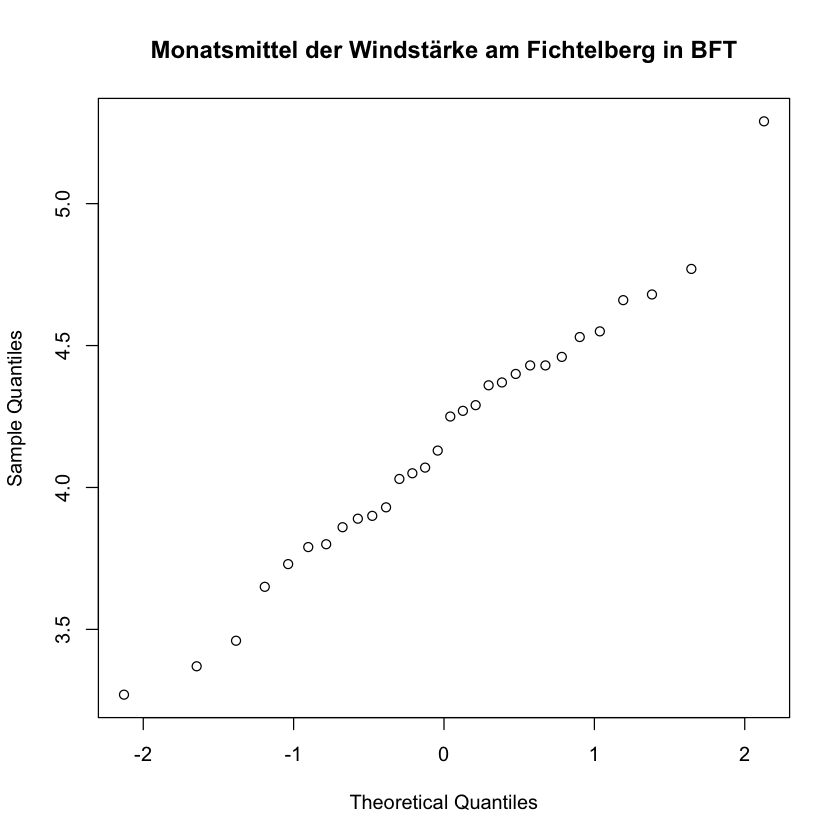

In [4]:
# Führen Sie diesen Codeblock aus!

data_weather_filtered <- read.csv("data_weather_filtered.csv", header = TRUE)

qqnorm(data_weather_filtered$MO_FK, main = "Monatsmittel der Windstärke am Fichtelberg in BFT")

Mit dem Befehl `qqline(<Daten>)` kann der Graph um eine Gerade ergänzt werden, die die Quantile der Normalverteilung darstellt. Der `qqline()`-Befehl ist dafür nach dem Befehl `qqplot()` auszuführen.

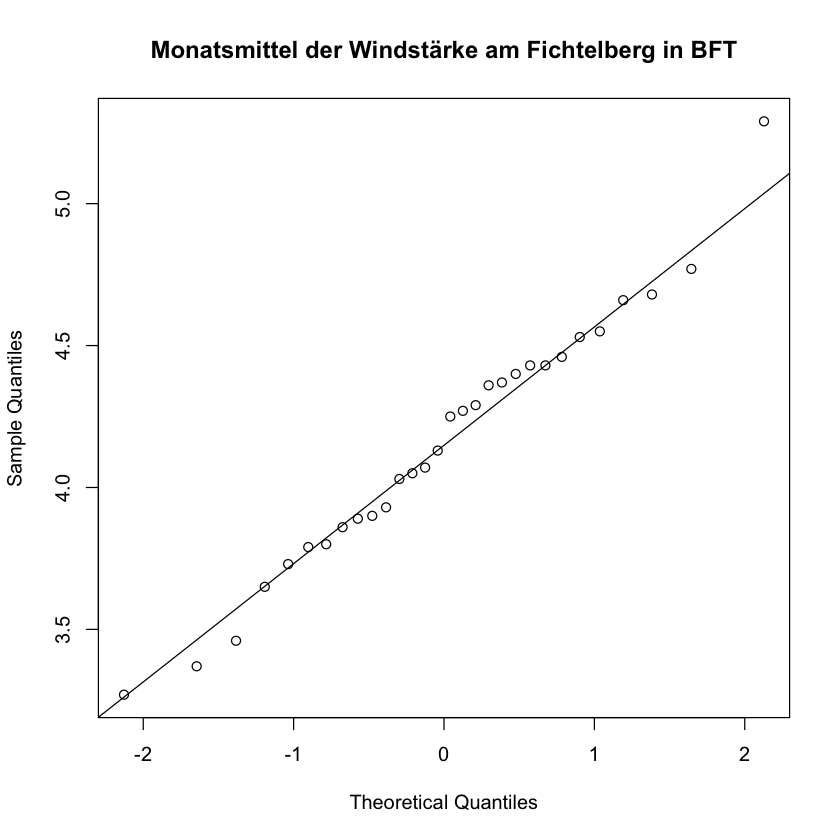

In [5]:
# Führen Sie diesen Codeblock aus!

qqnorm(data_weather_filtered$MO_FK, main = "Monatsmittel der Windstärke am Fichtelberg in BFT")
qqline(data_weather_filtered$MO_FK)

## Hausaufgabe

Lesen Sie die DWD-Daten mit monatlichen Messungen für Dresden (Stations-ID = 01051) ein (Stations-ID im Namen der Datei an letzter Stelle vor der Endung .txt). Filtern Sie Lufttemperaturmessungen in 2m Höhe (Spalte MO_TT) für alle Juni-Monate im Zeitraum 01.01.2007 – 01.01.2021 und entfernen fehlerhafte Messungen (-999).

Erstellen Sie für die Daten der mittleren monatlichen Lufttemperatur in 2m Höhe der Ihnen zugewiesenen Station einen QQ-Plot und interpretieren Sie den Plot in Form eines Antwortsatzes.

Prüfen Sie programmatisch mittels Shapiro-Wilk-Test und Kolmogorov-Smirnov-Test, ob für die genutzten Daten eine Normalverteilung angenommen werden kann.

Wenden Sie je nach Testergebnis ein geeignetes Testverfahren, t-Test bzw. Wilcoxon-Test, für die folgenden Fragestellungen an:

1. Kann für die mittlere Lufttemperatur des Monats Juni in Dresden der Wert 14,5°C angenommen werden?

ZUSATZAUFGABEN (je 0,5 Punkte):

2. Kann für die mittlere Lufttemperatur des Monats Juni angenommen werden, dass der Wert >= 15°C ist?

3. Kann angenommen werden, dass die mittleren Lufttemperaturen des Monats Juni in Dresden und auf dem Fichtelberg (Stations-ID = 1358) gleich sind? Setzen Sie den Konfidenz-Level auf 0,9.

Beantworten Sie die 1-3 Fragen mit Hilfe der vorgestellten Funktionen in R und stellen Sie die Ergebnisse in Form einer Tabelle wie folgt zusammen:

| Aufgabe 	| Testergebnisse Normalverteilung 	| Gewähltes Testverfahren 	| p-Wert 	| Interpretation = Annahme/Ablehnung<br>Nullhypothese + Begründung<br>(Antwortsatz) 	|
|---------	|---------------------------------	|-------------------------	|--------	|-------------------------------------------------------------------------------------------	|
| 1)      	| ...                             	| ...                     	| ...    	| ...                                                                                       	|
| ...     	| ...                             	| ...                     	| ...    	| ...                                                                                       	|


*Hinweis 1: Zur Beantwortung der Frage (3) muss das gewählte Testverfahren im Zweistichprobenfall durchgeführt werden. Die entsprechende Syntax zur Parametrisierung der jeweiligen Tests finden Sie in der Hilfe, indem Sie den Test-Befehl, z. B. t.test, in die Suchmaske der Hilfe eingeben.*

*Hinweis 2: Geben Sie bei der Interpretation jeweils das Testergebnis (Annahme bzw. Ablehnung der Nullhypothese) und die Bedeutung, sowie den bzw. die Mittelwerte an.*

*Hinweis 3: An einigen Stationen kann es zu Warnmeldungen von R kommen, da Bindungen existieren. Dies bedeutet, dass einige Werte eine identische Ausprägung haben, was bei der Rangbildung des Kolmogorov-Smirnov-Test zu Problemen führen kann. Der Test ist in diesem Fall aber dennoch interpretierbar.*

Der Plot mit Antwortsatz, sowie die Tabelle sind in einem PDF-Dokument zusammen mit einem Screenshot von RStudio mit dem QQ-Plot im Plots-Fenster abzuspeichern.

Kommentieren Sie Ihr Skript sinnvoll in englischer oder deutscher Sprache. Laden Sie das R-Skript und die PDF als ZIP-komprimierten Ordner im OPAL hoch. Abgabedatum ist der 21.06.2022 um 08:00 Uhr.